In [4]:
# most important libraries for this task

import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [5]:
import matplotlib.pyplot as plt

In [6]:
# image dataset path (it was on jupyter notebook)
# base_dir=r"C:\Users\Ibrahim Aliyev\Desktop\Deep_learning_Project\Nouveau dossier"


# in Google Colab, I uploaded zip file and extracted it using commands below:
import zipfile
zip_ref = zipfile.ZipFile("/content/Dataset.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [7]:
# our base directory in Colab:
base_dir = "/content/Nouveau dossier"

In [8]:
# all images in folder of teacher in size 227x227 (width x height)
IMAGE_WIDTH=227
IMAGE_HEIGHT=227
BATCH_SIZE=32 

# data augmentation part
train_datagen=ImageDataGenerator(
    # rotation_range = 43,
    # width_shift_range = 0.2,
    # height_shift_range = 0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # vertical_flip = True,
    validation_split=0.2, # 20% for test, 80% for train
    # fill_mode='nearest'
)

test_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    # subset='training',
    class_mode = 'categorical'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_WIDTH,IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    # subset='validation',
    class_mode = 'categorical'
)

Found 3000 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [9]:
# class names will be used as label indices while training the model
labels = {value: key for key, value in train_datagen.class_indices.items()}

print("All the classes:\n")
for key, value in labels.items():
    print(f"{key} : {value}")

All the classes:

0 : Ecrou NOK
1 : Ecrou OK
2 : Rondelle NOK
3 : Rondelle OK
4 : Vis NOK
5 : Vis OK


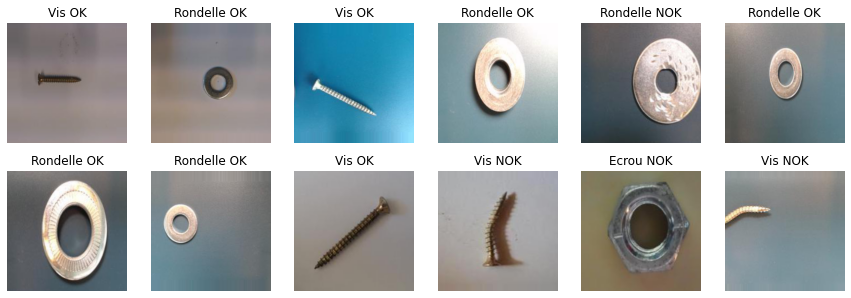

In [10]:
# plotting some training dataset images

fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(15, 5))
index = 0

for i in range(2):
    for j in range(6):
        label = labels[np.argmax(train_datagen[0][1][index])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_datagen[0][0][index][:, :, :])
        ax[i, j].axis("off")
        index += 1

plt.show()

In [11]:
# reducing the learning rate using Plateau

from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [12]:
# CNN model defining - 

# from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# initialize sequential model
cnn=Sequential()


# cnn.add(Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3))) # same input shape as our images
# cnn.add(Conv2D(10, 3, activation='relu'))
# cnn.add(MaxPool2D())
# cnn.add(Conv2D(10, 3, activation='relu'))
# cnn.add(Conv2D(10, 3, activation='relu'))
# cnn.add(MaxPool2D())
# cnn.add(Flatten())
# cnn.add(Dense(6, activation='softmax'))

# adding layers to the model
# cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,3)))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# cnn.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'))

# cnn.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# cnn.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# cnn.add(tf.keras.layers.BatchNormalization()) # add batch normalization

# cnn.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# cnn.add(tf.keras.layers.Flatten()) # adding flatting layer
# cnn.add(tf.keras.layers.Dropout(0.5)) # adding dropout

# adding fully connected layers
# cnn.add(tf.keras.layers.Dense(512, activation='relu')) 
# cnn.add(tf.keras.layers.Dense(128, activation='relu')) 

# cnn.add(tf.keras.layers.Dense(64, activation='relu')) 

# cnn.add(tf.keras.layers.Dense(6,activation='softmax')) 


# adding layers to the model

cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[IMAGE_WIDTH, IMAGE_HEIGHT, 3])) #convolutional
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) # max pooling

cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn.add(tf.keras.layers.BatchNormalization()) # add batch normalization

# adding flatting layer
cnn.add(tf.keras.layers.Flatten())
# cnn.add(tf.keras.layers.Dropout(0.5)) # adding dropout

# adding fully connected layers
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))

cnn.add(tf.keras.layers.Dense(6, activation='softmax')) # 6 neurons for 6 different classes, softmax for multiclass classify

cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]) # adam optimizer

# train dataset
model_fitted = cnn.fit(x=train_datagen, validation_data=test_datagen, epochs=30, callbacks=[reduce_lr]) # reduce learning rate callback

Epoch 1/30
94/94 [==============================] - 50s 421ms/step - loss: 1.7495 - accuracy: 0.2190 - val_loss: 1.5820 - val_accuracy: 0.3320 - lr: 0.0010
Epoch 2/30
94/94 [==============================] - 40s 428ms/step - loss: 1.4487 - accuracy: 0.3777 - val_loss: 1.1425 - val_accuracy: 0.5403 - lr: 0.0010
Epoch 3/30
94/94 [==============================] - 39s 420ms/step - loss: 1.1784 - accuracy: 0.5070 - val_loss: 0.9971 - val_accuracy: 0.5977 - lr: 0.0010
Epoch 4/30
94/94 [==============================] - 39s 414ms/step - loss: 0.9877 - accuracy: 0.5900 - val_loss: 0.8084 - val_accuracy: 0.6657 - lr: 0.0010
Epoch 5/30
94/94 [==============================] - 40s 424ms/step - loss: 0.8699 - accuracy: 0.6363 - val_loss: 0.7139 - val_accuracy: 0.7010 - lr: 0.0010
Epoch 6/30
94/94 [==============================] - 40s 421ms/step - loss: 0.7300 - accuracy: 0.6897 - val_loss: 0.6377 - val_accuracy: 0.7263 - lr: 0.0010
Epoch 7/30
94/94 [==============================] - 40s 421ms/st

In [13]:
# summary

print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 48)      1344      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 48)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 48)      20784     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 32)        13856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [14]:
# compiling the CNN model

# cnn.compile(optimizer=tf.keras.optimizers.Adam(),
#             loss=tf.keras.losses.CategoricalCrossentropy(),
#             metrics=['accuracy'])

In [15]:
# model_fitted = cnn.fit(train_datagen,epochs=20,validation_data=test_datagen, callbacks=[reduce_lr] ) # 

In [16]:
# obtain metrics from fitted model history

accuracy_ = model_fitted.history['accuracy']
val_accuracy = model_fitted.history['val_accuracy']

loss_ = model_fitted.history['loss']
val_loss = model_fitted.history['val_loss']

learning_rate = model_fitted.history['lr']

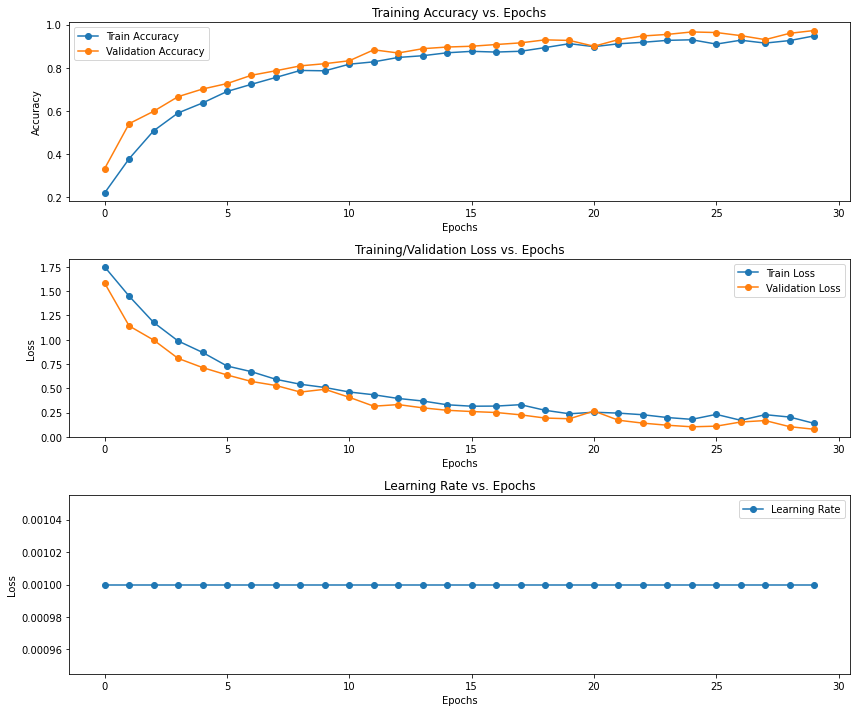

In [17]:
# plot metrics

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(accuracy_, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(loss_, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [18]:
# model prediction

predictions = cnn.predict(test_datagen)

94/94 [==============================] - 6s 67ms/step


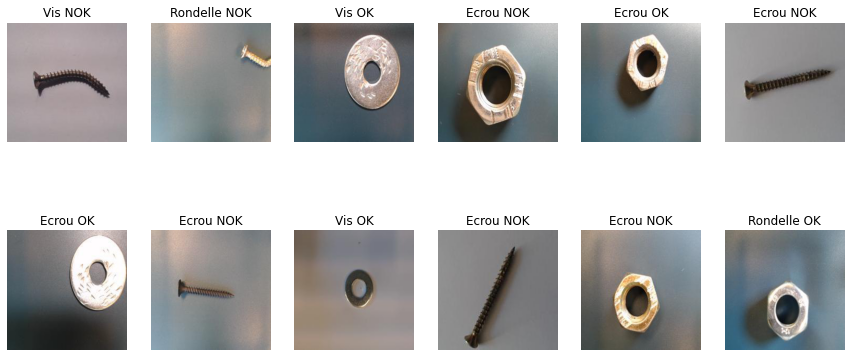

In [19]:
# plotting some test dataset images

fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(15, 7))
index = 0

for i in range(2):
    for j in range(6):
        predicted_label = labels[np.argmax(predictions[index])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_datagen[0][0][index])
        ax[i, j].axis("off")
        index += 1

plt.show()

In [20]:
# obtaining metrics from test dataset

test_loss, test_accuracy = cnn.evaluate(test_datagen, batch_size=BATCH_SIZE)

94/94 [==============================] - 6s 61ms/step - loss: 0.0788 - accuracy: 0.9727


In [21]:
print(f"Test Loss:     {test_loss}") # test loss
print(f"Test Accuracy: {test_accuracy}") # test accuracy

Test Loss:     0.07881772518157959
Test Accuracy: 0.9726666808128357


In [22]:
# confusion matrix step

y_pred = np.argmax(predictions, axis=1)
y_true = test_datagen.classes

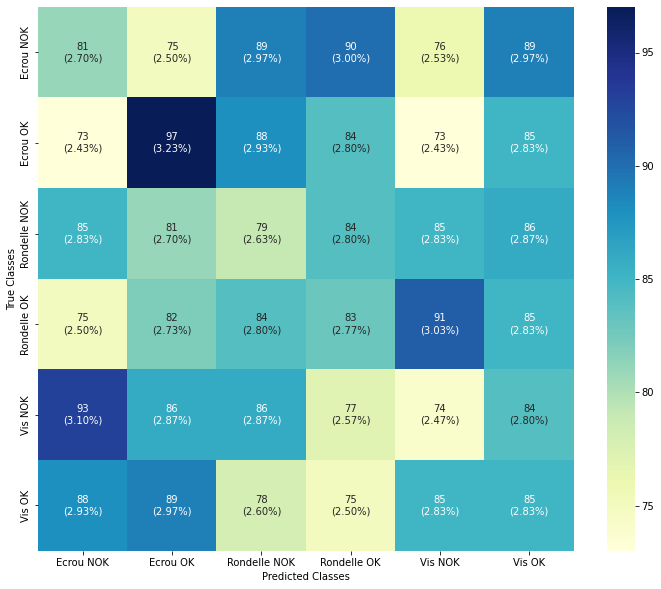

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(6, 6)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

   Ecrou NOK       0.16      0.16      0.16       500
    Ecrou OK       0.19      0.19      0.19       500
Rondelle NOK       0.16      0.16      0.16       500
 Rondelle OK       0.17      0.17      0.17       500
     Vis NOK       0.15      0.15      0.15       500
      Vis OK       0.17      0.17      0.17       500

    accuracy                           0.17      3000
   macro avg       0.17      0.17      0.17      3000
weighted avg       0.17      0.17      0.17      3000



In [25]:
# looking for wrong predictions

errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

In [26]:
test_images = test_datagen.filenames
test_img = np.asarray(test_images)[errors]

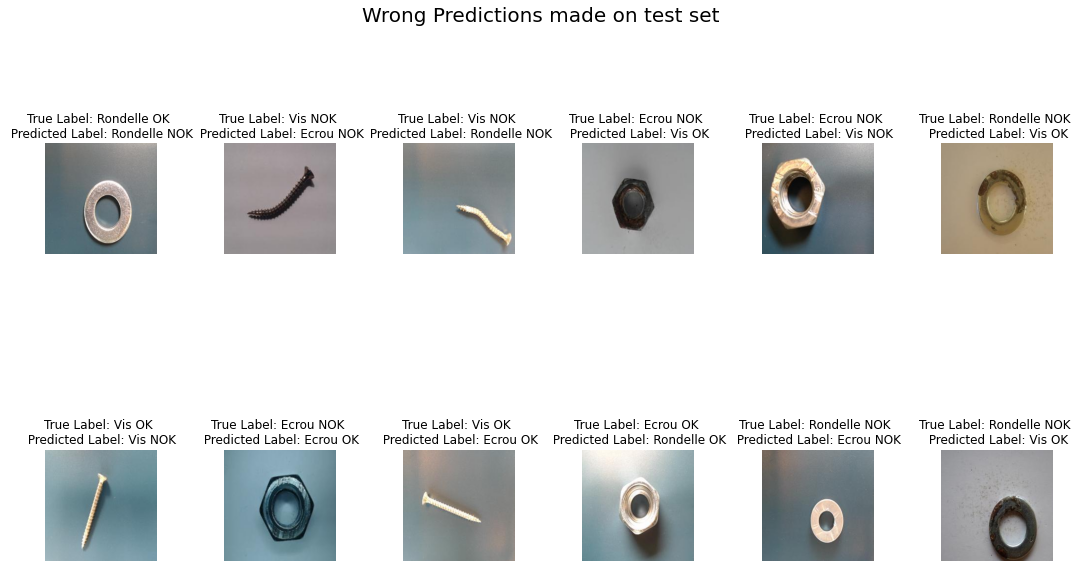

In [27]:
# wrong predictions (predicted label vs true label)

import os
import cv2

fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(15, 10))
index = 0

for i in range(2):
    for j in range(6):
        index = np.random.randint(0, len(test_img))
        true_index = y_true_errors[index]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[index]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(base_dir, test_img[index])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()